In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import joblib
from sklearn.metrics import confusion_matrix

# Load Data and Eliminate the ethernet features

In [2]:
test1_csv = pd.read_csv("./test2_dnsexfiltrator_features.csv")
test2_csv = pd.read_csv("./test2_dnscat2_features.csv")

In [3]:
df_test1 = pd.DataFrame(test1_csv)
df_test2 = pd.DataFrame(test2_csv)

In [4]:
df_test1.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,DoH
0,10.0.2.39,10.0.2.30,58033,443,2023-12-09 19:14:17,14654.072606,3184078,217.282805,2949346,201.264596,...,0.577769,3.533839e-07,0.000594,0.001482,0.001478,0.001381,0.018557,0.169359,0.401208,True
1,10.0.2.39,10.0.2.30,53952,443,2023-12-08 04:17:59,21099.465242,4358922,206.589217,4049943,191.945291,...,0.577634,2.276354e-07,0.000477,0.001471,0.001467,0.001477,0.025815,-0.012355,0.324322,True
2,10.0.2.39,10.0.2.30,49824,443,2023-12-06 15:25:05,2346.115464,877314,373.943232,774577,330.152975,...,0.578811,3.085922e-06,0.001757,0.001507,0.001465,0.001384,0.072481,0.070270,1.165338,True
3,10.0.2.39,10.0.2.30,51823,443,2023-12-07 09:01:14,5846.886804,1644561,281.271223,1484708,253.931374,...,0.578196,3.134590e-07,0.000560,0.001471,0.001469,0.001490,0.009684,-0.034280,0.380658,True
4,10.0.2.39,10.0.2.30,56965,443,2023-12-09 06:53:55,6912.503942,1465728,212.040096,1354570,195.959382,...,0.578790,1.218495e-06,0.001104,0.001489,0.001479,0.001376,0.026340,0.102089,0.741493,True


In [5]:
# below = test
df_test1 = df_test1.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMode', 'PacketLengthSkewFromMode', 'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean', 'ResponseTimeTimeMedian', 'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode', 'ResponseTimeTimeCoefficientofVariation','TimeStamp','DoH'],axis=1)
df_test2 = df_test2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMode', 'PacketLengthSkewFromMode', 'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean', 'ResponseTimeTimeMedian', 'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode', 'ResponseTimeTimeCoefficientofVariation','TimeStamp','DoH'],axis=1)

# Add Class Label to the data and Join the data

In [6]:
df_test1['Class']= 0 # dnsexfiltrator
df_test2['Class']= 1 # dnscat2

In [7]:
df_test1

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthSkewFromMedian,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,Class
0,14654.072606,3184078,217.282805,2949346,201.264596,4129.483258,64.261056,141.111791,166.0,-1.161895,0.455391,1.789328e+07,4230.045336,7321.345510,7320.400452,0.000000,0.000670,1.730796,0.577769,0
1,21099.465242,4358922,206.589217,4049943,191.945291,3559.108251,59.658262,134.301172,155.0,-1.040870,0.444213,3.712363e+07,6092.916492,10548.052498,10548.610995,0.000000,-0.000275,1.731199,0.577634,0
2,2346.115464,877314,373.943232,774577,330.152975,4308.323242,65.637819,142.428953,174.0,-1.442966,0.460846,4.593105e+05,677.724480,1170.890244,1171.950756,0.000000,-0.004694,1.727679,0.578811,0
3,5846.886804,1644561,281.271223,1484708,253.931374,4421.038255,66.490889,144.265778,174.0,-1.341577,0.460892,2.849284e+06,1687.982249,2919.392575,2919.363754,0.000000,0.000051,1.729516,0.578196,0
4,6912.503942,1465728,212.040096,1354570,195.959382,3860.144547,62.130062,137.334340,161.0,-1.142715,0.452400,3.986106e+06,1996.523527,3449.480310,3446.156147,0.000000,0.004995,1.727743,0.578790,0
5,19727.187528,4569898,231.654816,4197802,212.792725,3485.950138,59.041935,133.568447,155.0,-1.088966,0.442035,3.244440e+07,5695.998789,9862.732867,9861.601485,0.000000,0.000596,1.731519,0.577527,0
6,3950.796282,1208463,305.878338,1084132,274.408479,3926.478955,62.661623,138.216374,165.0,-1.282298,0.453359,1.301361e+06,1140.772195,1971.015365,1970.790021,0.000000,0.000593,1.727791,0.578774,0
7,13663.742860,3626203,265.388703,3284271,240.363935,3693.784831,60.776515,136.271696,161.0,-1.220618,0.445995,1.556730e+07,3945.541843,6829.444126,6830.000359,5085.393263,-0.000423,0.442031,0.577725,0
8,8247.960554,2081435,252.357536,1899819,230.338032,4486.308936,66.979914,145.020726,174.0,-1.297969,0.461864,5.667573e+06,2380.666493,4121.063282,4119.328351,0.000000,0.002186,1.731054,0.577683,0
9,11110.590574,3410534,306.962441,3056665,275.112739,3896.196560,62.419521,138.879443,166.0,-1.303465,0.449451,1.029765e+07,3208.994427,5553.665977,5554.636788,0.000000,-0.000908,1.730656,0.577816,0


In [8]:
frame = [df_test1,df_test2]
df_test = pd.concat(frame)

# Split the data and Normalize 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Split the dataset in 80:20
#X_train, X_test, y_train, y_test = train_test_split(df_binary[[col for col in df_binary.columns if col != "Class"]], 
                                                    #1df_binary["Class"], test_size=0.2)
#X_train.shape, X_test.shape

In [10]:
x_test = df_test[[col for col in df_test.columns if col != "Class"]]
y_test = df_test["Class"]

In [11]:
x_test.shape, y_test.shape

((63, 19), (63,))

In [12]:
x_test

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthSkewFromMedian,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation
0,14654.072606,3184078,217.282805,2949346,201.264596,4129.483258,64.261056,141.111791,166.0,-1.161895,0.455391,1.789328e+07,4230.045336,7321.345510,7320.400452,0.000000,0.000670,1.730796,0.577769
1,21099.465242,4358922,206.589217,4049943,191.945291,3559.108251,59.658262,134.301172,155.0,-1.040870,0.444213,3.712363e+07,6092.916492,10548.052498,10548.610995,0.000000,-0.000275,1.731199,0.577634
2,2346.115464,877314,373.943232,774577,330.152975,4308.323242,65.637819,142.428953,174.0,-1.442966,0.460846,4.593105e+05,677.724480,1170.890244,1171.950756,0.000000,-0.004694,1.727679,0.578811
3,5846.886804,1644561,281.271223,1484708,253.931374,4421.038255,66.490889,144.265778,174.0,-1.341577,0.460892,2.849284e+06,1687.982249,2919.392575,2919.363754,0.000000,0.000051,1.729516,0.578196
4,6912.503942,1465728,212.040096,1354570,195.959382,3860.144547,62.130062,137.334340,161.0,-1.142715,0.452400,3.986106e+06,1996.523527,3449.480310,3446.156147,0.000000,0.004995,1.727743,0.578790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,660.428681,388183,587.774291,344863,522.180532,4291.689309,65.510986,148.030291,167.0,-0.868696,0.442551,3.666099e+04,191.470592,328.663616,328.212225,660.428641,0.007072,-1.732721,0.582573
28,408.753424,398329,974.497036,347491,850.123766,5225.169273,72.285332,150.609855,168.0,-0.721729,0.479951,1.403641e+04,118.475370,201.584916,199.067328,0.000000,0.063750,1.701492,0.587719
29,1184.545018,592722,500.379463,529861,447.311830,5382.463689,73.365276,152.961303,168.0,-0.614952,0.479633,1.161804e+05,340.852495,589.152248,584.336694,0.000000,0.042384,1.728467,0.578547
30,821.039866,777971,947.543514,676927,824.475191,4384.861115,66.218284,148.428688,168.0,-0.886673,0.446129,5.658005e+04,237.865609,412.484099,413.127897,0.000000,-0.008120,1.734106,0.576666


In [13]:
y_test

0     0
1     0
2     0
3     0
4     0
     ..
27    1
28    1
29    1
30    1
31    1
Name: Class, Length: 63, dtype: int64

In [14]:
count_values = y_test.value_counts()
print(count_values)
# 0: dnsexfiltrator
# 1: dnscat2

1    32
0    31
Name: Class, dtype: int64


In [15]:
from sklearn import preprocessing

min_max_scaler = joblib.load('min_max_scaler2.joblib')

x_test = x_test.values

# Transform the test data using the loaded scaler
xtest_scaled = min_max_scaler.transform(x_test)

X_test_new = pd.DataFrame(xtest_scaled)

In [16]:
X_test_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.307471,1.181909,0.061450,1.230872,-0.003859,0.006416,0.014658,-0.003949,-0.004274,0.347923,0.046512,1.707616,1.307046,1.307204,1.306823,0.000000,0.292288,0.991691,0.008329
1,1.882996,1.618763,0.048836,1.691188,-0.017403,-0.005623,-0.013334,-0.049553,-0.051282,0.399383,0.031220,3.542834,1.883070,1.883610,1.883211,0.000000,0.291522,0.991766,0.008252
2,0.208464,0.324162,0.246246,0.321292,0.183461,0.010190,0.023031,0.004870,0.029915,0.228412,0.053974,0.043833,0.208621,0.208513,0.209034,0.000000,0.287940,0.991108,0.008930
3,0.521056,0.609455,0.136930,0.618299,0.072684,0.012570,0.028219,0.017170,0.029915,0.271522,0.054036,0.271916,0.521006,0.520858,0.521030,0.000000,0.291786,0.991452,0.008576
4,0.616208,0.542958,0.055266,0.563870,-0.011570,0.000731,0.001699,-0.029243,-0.025641,0.356078,0.042420,0.380407,0.616411,0.615551,0.615087,0.000000,0.295792,0.991120,0.008917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.057945,0.142283,0.498481,0.141567,0.462544,0.009839,0.022260,0.042376,0.000000,0.472592,0.028947,0.003498,0.058265,0.058061,0.058387,0.555527,0.297476,0.343883,0.011097
59,0.035472,0.146056,0.954658,0.142667,0.939160,0.029542,0.063458,0.059649,0.004274,0.535082,0.080108,0.001339,0.035694,0.035360,0.035328,0.000000,0.343408,0.986210,0.014062
60,0.104745,0.218339,0.395390,0.218941,0.353734,0.032862,0.070026,0.075394,0.004274,0.580484,0.079673,0.011087,0.104456,0.104594,0.104117,0.000000,0.326093,0.991255,0.008778
61,0.072286,0.287222,0.922864,0.280451,0.901884,0.011806,0.026561,0.045044,0.004274,0.464948,0.033841,0.005399,0.072611,0.073034,0.073548,0.000000,0.285164,0.992310,0.007694


In [17]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.title("Confusion Matrix")
    #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Exfiltration", "C&C"], yticklabels=["Exfiltration", "C&C"])
    
    #labels = ["C&C", "Exfiltration"]
    #plt.xticks(ticks=[0.5, 1.5], labels=labels)
    #plt.yticks(ticks=[0.5, 1.5], labels=labels)
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    plt.show()

# Logistic Regression

In [18]:
model_filename_logistic = './logistic_regression_model2.joblib'

In [19]:
logistic_model = joblib.load(model_filename_logistic)

y_pred = logistic_model.predict(X_test_new)

#y_prob = logistic_model.predict_proba(X_test_new)

# save classification report and metrics
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report

{'0': {'precision': 1.0,
  'recall': 0.967741935483871,
  'f1-score': 0.9836065573770492,
  'support': 31},
 '1': {'precision': 0.9696969696969697,
  'recall': 1.0,
  'f1-score': 0.9846153846153847,
  'support': 32},
 'accuracy': 0.9841269841269841,
 'macro avg': {'precision': 0.9848484848484849,
  'recall': 0.9838709677419355,
  'f1-score': 0.9841109709962169,
  'support': 63},
 'weighted avg': {'precision': 0.9846079846079846,
  'recall': 0.9841269841269841,
  'f1-score': 0.9841189775616005,
  'support': 63}}

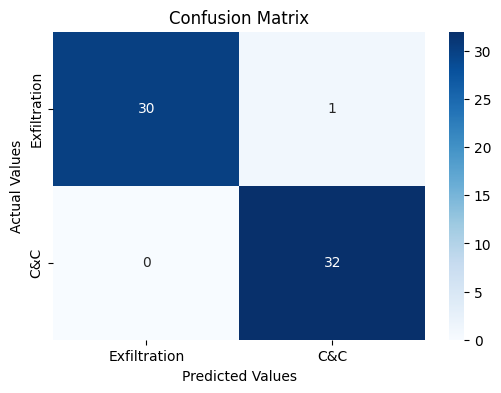

In [20]:
plot_confusion_matrix(y_test, y_pred)

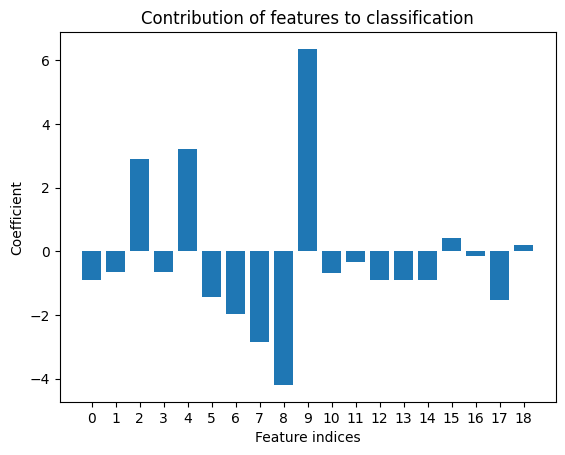

In [21]:
coefficients = logistic_model.coef_

df = df_test.iloc[:,:-1]

feature_coefficients = dict(zip(df.columns, coefficients[0]))

import matplotlib.pyplot as plt

#print(len(df.columns.tolist()))
#print(len(coefficients[0]))

plt.bar(range(len(df.columns)), coefficients[0])
plt.xlabel("Feature indices")
plt.ylabel("Coefficient")
plt.title("Contribution of features to classification")
plt.xticks(range(len(df.columns)), range(len(df.columns)))  # Facultatif : pour afficher les indices sur l'axe x
plt.show()

In [22]:
print(df.columns[2] + ' ' + str(feature_coefficients['FlowSentRate']))
print(df.columns[4] + ' ' + str(feature_coefficients['FlowReceivedRate']))
print(df.columns[7] + ' ' + str(feature_coefficients['PacketLengthMean']))
print(df.columns[8] + ' ' + str(feature_coefficients['PacketLengthMedian']))
print(df.columns[9] + ' ' + str(feature_coefficients['PacketLengthSkewFromMedian']))

FlowSentRate 2.909261602122089
FlowReceivedRate 3.2278242661955785
PacketLengthMean -2.845058253423355
PacketLengthMedian -4.194965950091841
PacketLengthSkewFromMedian 6.361704008737701


In [23]:
for i in range(len(df.columns)):
    print(df.columns[i])

Duration
FlowBytesSent
FlowSentRate
FlowBytesReceived
FlowReceivedRate
PacketLengthVariance
PacketLengthStandardDeviation
PacketLengthMean
PacketLengthMedian
PacketLengthSkewFromMedian
PacketLengthCoefficientofVariation
PacketTimeVariance
PacketTimeStandardDeviation
PacketTimeMean
PacketTimeMedian
PacketTimeMode
PacketTimeSkewFromMedian
PacketTimeSkewFromMode
PacketTimeCoefficientofVariation


In [24]:
'''
import sklearn.metrics as metrics

y_pred = logistic_model.predict_proba(X_test_new)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
'''

'\nimport sklearn.metrics as metrics\n\ny_pred = logistic_model.predict_proba(X_test_new)[::,1]\nfpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)\nauc = metrics.roc_auc_score(y_test, y_pred)\nplt.plot(fpr,tpr,label="data 1, auc="+str(auc))\nplt.legend(loc=4)\nplt.show()\n'

# SVM

In [25]:
from sklearn import svm

In [26]:
model_filename_svm = './svm_model2.joblib'

In [27]:
svm_model = joblib.load(model_filename_svm)
y_pred = svm_model.predict(X_test_new)

# save classification report and metrics
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report

{'0': {'precision': 1.0,
  'recall': 0.967741935483871,
  'f1-score': 0.9836065573770492,
  'support': 31},
 '1': {'precision': 0.9696969696969697,
  'recall': 1.0,
  'f1-score': 0.9846153846153847,
  'support': 32},
 'accuracy': 0.9841269841269841,
 'macro avg': {'precision': 0.9848484848484849,
  'recall': 0.9838709677419355,
  'f1-score': 0.9841109709962169,
  'support': 63},
 'weighted avg': {'precision': 0.9846079846079846,
  'recall': 0.9841269841269841,
  'f1-score': 0.9841189775616005,
  'support': 63}}

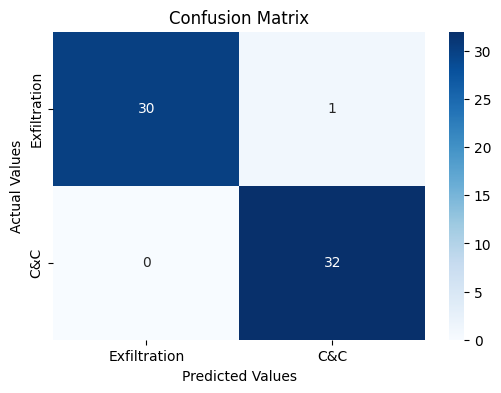

In [28]:
plot_confusion_matrix(y_test, y_pred)

# Naive Bayes

In [29]:
model_filename_nb = './naive_bayes_model2.joblib'

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
naive_bayes_model = joblib.load(model_filename_nb)

y_pred = naive_bayes_model.predict(X_test_new)

# save classification report and metrics
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report

{'0': {'precision': 1.0,
  'recall': 0.9354838709677419,
  'f1-score': 0.9666666666666666,
  'support': 31},
 '1': {'precision': 0.9411764705882353,
  'recall': 1.0,
  'f1-score': 0.9696969696969697,
  'support': 32},
 'accuracy': 0.9682539682539683,
 'macro avg': {'precision': 0.9705882352941176,
  'recall': 0.967741935483871,
  'f1-score': 0.9681818181818181,
  'support': 63},
 'weighted avg': {'precision': 0.9701213818860878,
  'recall': 0.9682539682539683,
  'f1-score': 0.9682058682058683,
  'support': 63}}

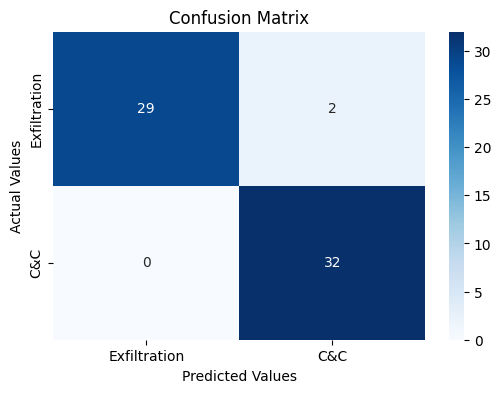

In [32]:
plot_confusion_matrix(y_test, y_pred)

# Decision Tree

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [34]:
model_filename_tree = './decision_tree_model2.joblib'

In [35]:
tree_model = joblib.load(model_filename_tree)

In [36]:
'''import utils
utils.DT_to_PNG(clf, lbc.feature_names, "Tree_task1")
clf.plot_tree(tree1)
plt.show()
'''
from sklearn import tree
text_representation = tree.export_text(tree_model)
print(text_representation)

|--- feature_8 <= 0.01
|   |--- class: 1
|--- feature_8 >  0.01
|   |--- class: 0



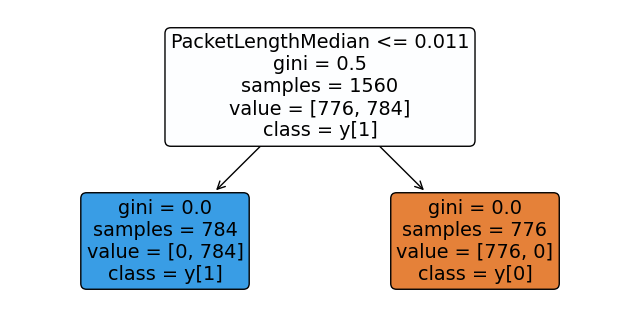

In [37]:
# Affichage de l'arbre de décision
plt.figure(figsize=(8,4))
plot_tree(tree_model, filled=True, feature_names=df.columns, class_names=True, rounded=True)
plt.show()

In [38]:
y_pred = tree_model.predict(X_test_new)

# save classification report and metrics
class_report = classification_report(y_test, y_pred, output_dict=True, zero_division='warn')
class_report

{'0': {'precision': 1.0,
  'recall': 0.2903225806451613,
  'f1-score': 0.45000000000000007,
  'support': 31},
 '1': {'precision': 0.5925925925925926,
  'recall': 1.0,
  'f1-score': 0.7441860465116279,
  'support': 32},
 'accuracy': 0.6507936507936508,
 'macro avg': {'precision': 0.7962962962962963,
  'recall': 0.6451612903225806,
  'f1-score': 0.597093023255814,
  'support': 63},
 'weighted avg': {'precision': 0.7930629041740153,
  'recall': 0.6507936507936508,
  'f1-score': 0.5994278331487635,
  'support': 63}}

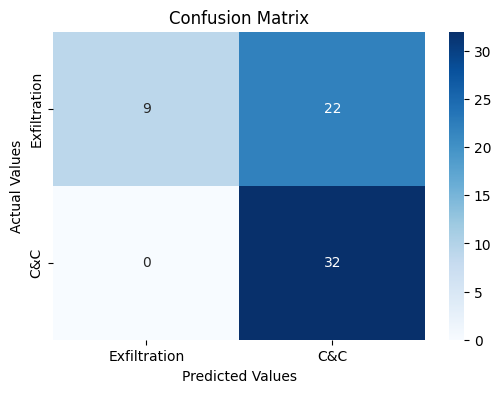

In [39]:
plot_confusion_matrix(y_test, y_pred)